<div style="background-color:#9dedde; padding: 15px">
<h2>Projet 7 : Implémentez un modèle de Scoring</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly import tools
import plotly.express as px
from datetime import datetime
import datetime

#pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', 1000)

# **Chargement des données**

In [2]:
df= pd.read_csv('application_train.csv')

In [3]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# **Analyse de la forme du dataset**

In [4]:
df.shape

(307511, 122)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
df.select_dtypes(object).nunique().sort_values(ascending = False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
CODE_GENDER                    3
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

In [9]:
(df.select_dtypes(object).nunique().sort_values(ascending = False)/len(df)).round(3)

ORGANIZATION_TYPE             0.0
OCCUPATION_TYPE               0.0
NAME_INCOME_TYPE              0.0
NAME_TYPE_SUITE               0.0
WEEKDAY_APPR_PROCESS_START    0.0
WALLSMATERIAL_MODE            0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
NAME_EDUCATION_TYPE           0.0
FONDKAPREMONT_MODE            0.0
CODE_GENDER                   0.0
HOUSETYPE_MODE                0.0
NAME_CONTRACT_TYPE            0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
EMERGENCYSTATE_MODE           0.0
dtype: float64

# **NaN & Duplicated**

In [10]:
df.duplicated().sum()

0

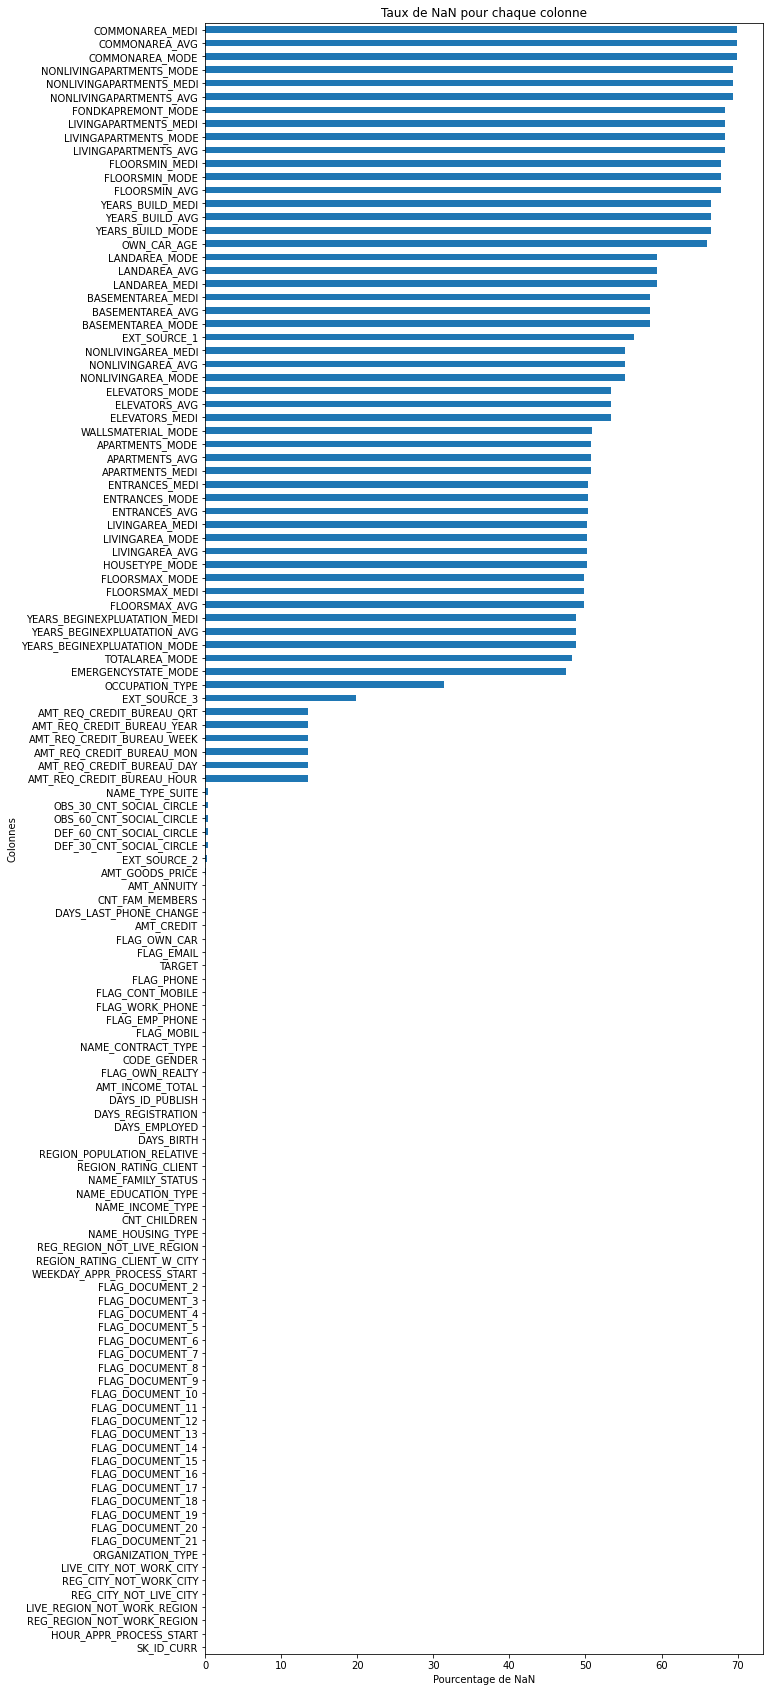

In [11]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer un graphique à barres horizontales pour visualiser les taux de NaN
plt.figure(figsize=(10, 30))
nan_counts.sort_values().plot(kind='barh')
plt.title('Taux de NaN pour chaque colonne')
plt.xlabel('Pourcentage de NaN')
plt.ylabel('Colonnes')
plt.show()

In [12]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer une dataframe triée par ordre décroissant des taux de NaN
sorted_nan_counts = nan_counts.sort_values(ascending=False).reset_index()
sorted_nan_counts.columns = ['Colonnes', 'Taux_NaN']


# Créer une coloration (cmap) pour la dataframe
cmap = plt.get_cmap('Reds')
sorted_nan_counts.style.background_gradient(cmap='Reds', subset=['Taux_NaN'])

,Colonnes,Taux_NaN
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MODE,69.432963
4,NONLIVINGAPARTMENTS_AVG,69.432963
5,NONLIVINGAPARTMENTS_MEDI,69.432963
6,FONDKAPREMONT_MODE,68.386172
7,LIVINGAPARTMENTS_MODE,68.354953
8,LIVINGAPARTMENTS_AVG,68.354953
9,LIVINGAPARTMENTS_MEDI,68.354953


In [13]:
# Calculer les taux de NaN pour chaque colonne
nan_percentages = df.isna().mean() * 100

# Identifier les colonnes avec plus de 60% de NaN
cols_to_drop = nan_percentages[nan_percentages > 60].index

# Supprimer les colonnes identifiées
df = df.drop(cols_to_drop, axis=1)

In [14]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer une dataframe triée par ordre décroissant des taux de NaN
sorted_nan_counts = nan_counts.sort_values(ascending=False).reset_index()
sorted_nan_counts.columns = ['Colonnes', 'Taux_NaN']


# Créer une coloration (cmap) pour la dataframe
cmap = plt.get_cmap('Greens')
sorted_nan_counts.style.background_gradient(cmap='Greens', subset=['Taux_NaN'])

,Colonnes,Taux_NaN
0,LANDAREA_AVG,59.376738
1,LANDAREA_MODE,59.376738
2,LANDAREA_MEDI,59.376738
3,BASEMENTAREA_AVG,58.515956
4,BASEMENTAREA_MODE,58.515956
5,BASEMENTAREA_MEDI,58.515956
6,EXT_SOURCE_1,56.381073
7,NONLIVINGAREA_AVG,55.179164
8,NONLIVINGAREA_MEDI,55.179164
9,NONLIVINGAREA_MODE,55.179164


In [15]:
df.duplicated(subset='SK_ID_CURR').sum()

0

# **Data Analyse**

In [16]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [17]:
df.describe(include=object)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,150503,66040,159428


# **SELECTION DES COLONNES**

In [18]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Liste des noms de colonnes
columns = {
    # Informations générales sur les clients :
    'SK_ID_CURR': 'ID_CLIENT',
    'TARGET': 'CIBLE',
    'NAME_CONTRACT_TYPE': 'TYPE_CONTRAT',

    # Informations personnelles sur le client :
    'CODE_GENDER': 'GENRE',
    'FLAG_OWN_CAR': 'PROPRIETAIRE_VOITURE',
    'FLAG_OWN_REALTY': 'PROPRIETAIRE_BIEN_IMMO',
    'CNT_CHILDREN': 'NBR_ENFANTS',
    'AMT_INCOME_TOTAL': 'REVENU_TOTAL',
    'NAME_TYPE_SUITE': 'NOM_TYPE_SUITE',
    'NAME_INCOME_TYPE': 'TYPE_REVENUS',
    'NAME_EDUCATION_TYPE': 'NIVEAU_EDUCATION',
    'NAME_FAMILY_STATUS': 'STATUT_FAMILIAL',
    'NAME_HOUSING_TYPE': 'TYPE_LOGEMENT',

    # Informations démographiques et régionales :
    'REGION_POPULATION_RELATIVE': 'POPULATION_REGION',
    'REG_REGION_NOT_LIVE_REGION': 'REG_NON_RESIDENCE_REGION',
    'REG_REGION_NOT_WORK_REGION': 'REG_NON_REGION_TRAVAIL',
    'LIVE_REGION_NOT_WORK_REGION': 'RESIDENCE_NON_TRAVAIL_REGION',
    'REG_CITY_NOT_LIVE_CITY': 'REG_NON_RESIDENCE_VILLE',
    'REG_CITY_NOT_WORK_CITY': 'REG_NON_TRAVAIL_VILLE',
    'LIVE_CITY_NOT_WORK_CITY': 'RESIDENCE_NON_TRAVAIL_VILLE',

    # Informations temporelles :
    'DAYS_BIRTH': 'JOURS_NAISSANCE',
    'DAYS_EMPLOYED': 'JOURS_EMPLOI',
    'DAYS_REGISTRATION': 'JOURS_ENREGISTREMENT',
    'DAYS_ID_PUBLISH': 'JOURS_ID_PUBLICATION',
    'WEEKDAY_APPR_PROCESS_START': 'JOUR_PROCESSUS_DEBUT',
    'HOUR_APPR_PROCESS_START': 'HEURE_PROCESSUS_DEBUT',
    'DAYS_LAST_PHONE_CHANGE': 'JOURS_DERNIER_CHANGEMENT_TELEPHONE',

    # Informations sur l'organisation du client :
    'ORGANIZATION_TYPE': 'TYPE_ORGANISATION',

    # Informations provenant de sources externes :
    'EXT_SOURCE_1': 'SOURCE_EXTERNE_1',
    'EXT_SOURCE_2': 'SOURCE_EXTERNE_2',
    'EXT_SOURCE_3': 'SOURCE_EXTERNE_3',

    # Informations sur les biens immobiliers du client :
    'AMT_CREDIT': 'TOTAL_CREDIT',
    'AMT_ANNUITY': 'REMB_MENSUEL',
    'AMT_GOODS_PRICE': 'MONTANT_PRIX_BIENS',
    'APARTMENTS_AVG': 'APPARTEMENTS_MOYENNE',
    'BASEMENTAREA_AVG': 'SUPERFICIE_SOUTERRAINE_MOYENNE',
    'YEARS_BEGINEXPLUATATION_AVG': 'DEBUT_EXPLOITATION_MOYENNE',
    'ELEVATORS_AVG': 'ASCENSEURS_MOYENNE',
    'ENTRANCES_AVG': 'ENTREES_MOYENNE',
    'FLOORSMAX_AVG': 'ETAGES_MAX_MOYENNE',
    'LANDAREA_AVG': 'SUPERFICIE_TERRAIN_MOYENNE',
    'LIVINGAREA_AVG': 'SUPERFICIE_HABITABLE_MOYENNE',
    'NONLIVINGAREA_AVG': 'SUPERFICIE_NON_HABITABLE_MOYENNE',
    'APARTMENTS_MODE': 'APPARTEMENTS_MODE',
    'BASEMENTAREA_MODE': 'SUPERFICIE_SOUTERRAINE_MODE',
    'YEARS_BEGINEXPLUATATION_MODE': 'DEBUT_EXPLOITATION_MODE',
    'ELEVATORS_MODE': 'ASCENSEURS_MODE',
    'ENTRANCES_MODE': 'ENTREES_MODE',
    'FLOORSMAX_MODE': 'ETAGES_MAX_MODE',
    'LANDAREA_MODE': 'SUPERFICIE_TERRAIN_MODE',
    'LIVINGAREA_MODE': 'SUPERFICIE_HABITABLE_MODE',
    'NONLIVINGAREA_MODE': 'SUPERFICIE_NON_HABITABLE_MODE',
    'APARTMENTS_MEDI': 'APPARTEMENTS_MEDIANE',
    'BASEMENTAREA_MEDI': 'SUPERFICIE_SOUTERRAINE_MEDIANE',
    'YEARS_BEGINEXPLUATATION_MEDI': 'DEBUT_EXPLOITATION_MEDIANE',
    'ELEVATORS_MEDI': 'ASCENSEURS_MEDIANE',
    'ENTRANCES_MEDI': 'ENTREES_MEDIANE',
    'FLOORSMAX_MEDI': 'ETAGES_MAX_MEDIANE',
    'LANDAREA_MEDI': 'SUPERFICIE_TERRAIN_MEDIANE',
    'LIVINGAREA_MEDI': 'SUPERFICIE_HABITABLE_MEDIANE',
    'NONLIVINGAREA_MEDI': 'SUPERFICIE_NON_HABITABLE_MEDIANE',
    'HOUSETYPE_MODE': 'MODELE_TYPE_LOGEMENT',
    'TOTALAREA_MODE': 'SUPERFICIE_TOTALE_MODE',
    'WALLSMATERIAL_MODE': 'MODELE_MATERIAUX_MURS',
    'EMERGENCYSTATE_MODE': 'MODE_URGENCE',

    # Informations sociales du client :
    'OBS_30_CNT_SOCIAL_CIRCLE': 'OBS_30_CNT_CERCLE_SOCIAL',
    'DEF_30_CNT_SOCIAL_CIRCLE': 'DEF_30_CNT_CERCLE_SOCIAL',
    'OBS_60_CNT_SOCIAL_CIRCLE': 'OBS_60_CNT_CERCLE_SOCIAL',
    'DEF_60_CNT_SOCIAL_CIRCLE': 'DEF_60_CNT_CERCLE_SOCIAL',

    # Informations sur les documents du client :
    'FLAG_MOBIL': 'FLAG_MOBILE',
    'FLAG_EMP_PHONE': 'FLAG_TELEPHONE_EMPLOYE',
    'FLAG_WORK_PHONE': 'FLAG_TELEPHONE_TRAVAIL',
    'FLAG_CONT_MOBILE': 'FLAG_TELEPHONE_MOBILE',
    'FLAG_PHONE': 'FLAG_TELEPHONE',
    'FLAG_EMAIL': 'FLAG_EMAIL',
    'FLAG_DOCUMENT_2': 'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3': 'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4': 'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5': 'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6': 'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7': 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8': 'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9': 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10': 'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11': 'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12': 'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13': 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14': 'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15': 'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16': 'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17': 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18': 'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19': 'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20': 'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21': 'FLAG_DOCUMENT_21',

    # Informations sur les demandes de crédit au bureau de crédit du client :
    'AMT_REQ_CREDIT_BUREAU_HOUR': 'NBR_DEMANDES_CREDIT_BUREAU_HEURE',
    'AMT_REQ_CREDIT_BUREAU_DAY': 'NBR_DEMANDES_CREDIT_BUREAU_JOUR',
    'AMT_REQ_CREDIT_BUREAU_WEEK': 'NBR_DEMANDES_CREDIT_BUREAU_SEMAINE',
    'AMT_REQ_CREDIT_BUREAU_MON': 'NBR_DEMANDES_CREDIT_BUREAU_MOIS',
    'AMT_REQ_CREDIT_BUREAU_QRT': 'NBR_DEMANDES_CREDIT_BUREAU_TRIMESTRE',
    'AMT_REQ_CREDIT_BUREAU_YEAR': 'NBR_DEMANDES_CREDIT_BUREAU_ANNEE'
}


In [20]:
df.rename(columns=columns, inplace=True)

In [21]:
df

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,TOTAL_CREDIT,REMB_MENSUEL,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NBR_DEMANDES_CREDIT_BUREAU_HEURE,NBR_DEMANDES_CREDIT_BUREAU_JOUR,NBR_DEMANDES_CREDIT_BUREAU_SEMAINE,NBR_DEMANDES_CREDIT_BUREAU_MOIS,NBR_DEMANDES_CREDIT_BUREAU_TRIMESTRE,NBR_DEMANDES_CREDIT_BUREAU_ANNEE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer une dataframe triée par ordre décroissant des taux de NaN
sorted_nan_counts = nan_counts.sort_values(ascending=False).reset_index()
sorted_nan_counts.columns = ['Colonnes', 'Taux_NaN']


# Créer une coloration (cmap) pour la dataframe
cmap = plt.get_cmap('Greens')
sorted_nan_counts.style.background_gradient(cmap='Oranges', subset=['Taux_NaN'])

,Colonnes,Taux_NaN
0,SUPERFICIE_TERRAIN_MOYENNE,59.376738
1,SUPERFICIE_TERRAIN_MODE,59.376738
2,SUPERFICIE_TERRAIN_MEDIANE,59.376738
3,SUPERFICIE_SOUTERRAINE_MOYENNE,58.515956
4,SUPERFICIE_SOUTERRAINE_MODE,58.515956
5,SUPERFICIE_SOUTERRAINE_MEDIANE,58.515956
6,SOURCE_EXTERNE_1,56.381073
7,SUPERFICIE_NON_HABITABLE_MOYENNE,55.179164
8,SUPERFICIE_NON_HABITABLE_MEDIANE,55.179164
9,SUPERFICIE_NON_HABITABLE_MODE,55.179164


In [23]:
# Calculer les taux de NaN pour chaque colonne
nan_percentages = df.isna().mean() * 100

# Identifier les colonnes avec plus de 60% de NaN
cols_to_drop = nan_percentages[nan_percentages > 30].index

# Supprimer les colonnes identifiées
df = df.drop(cols_to_drop, axis=1)

In [24]:
df

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,TOTAL_CREDIT,REMB_MENSUEL,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NBR_DEMANDES_CREDIT_BUREAU_HEURE,NBR_DEMANDES_CREDIT_BUREAU_JOUR,NBR_DEMANDES_CREDIT_BUREAU_SEMAINE,NBR_DEMANDES_CREDIT_BUREAU_MOIS,NBR_DEMANDES_CREDIT_BUREAU_TRIMESTRE,NBR_DEMANDES_CREDIT_BUREAU_ANNEE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df.columns.tolist()

['ID_CLIENT',
 'CIBLE',
 'TYPE_CONTRAT',
 'GENRE',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'NBR_ENFANTS',
 'REVENU_TOTAL',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'MONTANT_PRIX_BIENS',
 'NOM_TYPE_SUITE',
 'TYPE_REVENUS',
 'NIVEAU_EDUCATION',
 'STATUT_FAMILIAL',
 'TYPE_LOGEMENT',
 'POPULATION_REGION',
 'JOURS_NAISSANCE',
 'JOURS_EMPLOI',
 'JOURS_ENREGISTREMENT',
 'JOURS_ID_PUBLICATION',
 'FLAG_MOBILE',
 'FLAG_TELEPHONE_EMPLOYE',
 'FLAG_TELEPHONE_TRAVAIL',
 'FLAG_TELEPHONE_MOBILE',
 'FLAG_TELEPHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'JOUR_PROCESSUS_DEBUT',
 'HEURE_PROCESSUS_DEBUT',
 'REG_NON_RESIDENCE_REGION',
 'REG_NON_REGION_TRAVAIL',
 'RESIDENCE_NON_TRAVAIL_REGION',
 'REG_NON_RESIDENCE_VILLE',
 'REG_NON_TRAVAIL_VILLE',
 'RESIDENCE_NON_TRAVAIL_VILLE',
 'TYPE_ORGANISATION',
 'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3',
 'OBS_30_CNT_CERCLE_SOCIAL',
 'DEF_30_CNT_CERCLE_SOCIAL',
 'OBS_60_CNT_CERCLE_SOCIAL',
 'DEF_60_CNT_CERCLE

In [26]:
col = {'ID_CLIENT',
 'CIBLE',
 'TYPE_CONTRAT',
       
 'GENRE',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'NBR_ENFANTS',
 'REVENU_TOTAL','TOTAL_CREDIT',
'REMB_MENSUEL',
 'MONTANT_PRIX_BIENS',
 'NOM_TYPE_SUITE',
 'TYPE_REVENUS',
 'NIVEAU_EDUCATION',
 'STATUT_FAMILIAL',
 'TYPE_LOGEMENT',
 'POPULATION_REGION',
 'JOURS_NAISSANCE',
 'JOURS_EMPLOI',
       
 'JOURS_ENREGISTREMENT',
 'JOURS_ID_PUBLICATION',
 'FLAG_MOBILE',
 #'FLAG_TELEPHONE_EMPLOYE',
 #'FLAG_TELEPHONE_TRAVAIL',
 'FLAG_TELEPHONE_MOBILE',
 #'FLAG_TELEPHONE',
 'FLAG_EMAIL',
       
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'JOUR_PROCESSUS_DEBUT',
 'HEURE_PROCESSUS_DEBUT',
 'REG_NON_RESIDENCE_REGION',
 'REG_NON_REGION_TRAVAIL',
 'RESIDENCE_NON_TRAVAIL_REGION',
 'REG_NON_RESIDENCE_VILLE',
 'REG_NON_TRAVAIL_VILLE',
 'RESIDENCE_NON_TRAVAIL_VILLE',
 'TYPE_ORGANISATION',
 'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3',
       
 #'OBS_30_CNT_CERCLE_SOCIAL',
 #'DEF_30_CNT_CERCLE_SOCIAL',
 #'OBS_60_CNT_CERCLE_SOCIAL',
 #'DEF_60_CNT_CERCLE_SOCIAL',
 #'JOURS_DERNIER_CHANGEMENT_TELEPHONE',
       
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
# 'FLAG_DOCUMENT_5',
# 'FLAG_DOCUMENT_6',
# 'FLAG_DOCUMENT_7',
# 'FLAG_DOCUMENT_8',
# 'FLAG_DOCUMENT_9',
# 'FLAG_DOCUMENT_10',
# 'FLAG_DOCUMENT_11',
# 'FLAG_DOCUMENT_12',
# 'FLAG_DOCUMENT_13',
# 'FLAG_DOCUMENT_14',
# 'FLAG_DOCUMENT_15',
# 'FLAG_DOCUMENT_16',
# 'FLAG_DOCUMENT_17',
# 'FLAG_DOCUMENT_18',
# 'FLAG_DOCUMENT_19',
# 'FLAG_DOCUMENT_20',
# 'FLAG_DOCUMENT_21',
       
 #'NBR_DEMANDES_CREDIT_BUREAU_HEURE',
 #'NBR_DEMANDES_CREDIT_BUREAU_JOUR',
 #'NBR_DEMANDES_CREDIT_BUREAU_SEMAINE',
 #'NBR_DEMANDES_CREDIT_BUREAU_MOIS',
 #'NBR_DEMANDES_CREDIT_BUREAU_TRIMESTRE',
 'NBR_DEMANDES_CREDIT_BUREAU_ANNEE'}

In [27]:
df = df.loc[:,col]

In [28]:
df.shape

(307511, 42)

#### **Création colonnes**

In [29]:
df.columns

Index(['NOM_TYPE_SUITE', 'TOTAL_CREDIT', 'FLAG_DOCUMENT_4',
       'POPULATION_REGION', 'REG_NON_RESIDENCE_VILLE', 'JOURS_ID_PUBLICATION',
       'SOURCE_EXTERNE_3', 'REVENU_TOTAL', 'TYPE_REVENUS', 'TYPE_ORGANISATION',
       'FLAG_MOBILE', 'JOUR_PROCESSUS_DEBUT', 'REG_NON_RESIDENCE_REGION',
       'NBR_DEMANDES_CREDIT_BUREAU_ANNEE', 'TYPE_CONTRAT',
       'JOURS_ENREGISTREMENT', 'REGION_RATING_CLIENT_W_CITY', 'CIBLE',
       'REMB_MENSUEL', 'FLAG_DOCUMENT_2', 'JOURS_NAISSANCE', 'JOURS_EMPLOI',
       'CNT_FAM_MEMBERS', 'NBR_ENFANTS', 'NIVEAU_EDUCATION',
       'HEURE_PROCESSUS_DEBUT', 'ID_CLIENT', 'RESIDENCE_NON_TRAVAIL_VILLE',
       'STATUT_FAMILIAL', 'REG_NON_TRAVAIL_VILLE', 'TYPE_LOGEMENT',
       'FLAG_TELEPHONE_MOBILE', 'REGION_RATING_CLIENT', 'FLAG_DOCUMENT_3',
       'MONTANT_PRIX_BIENS', 'FLAG_EMAIL', 'PROPRIETAIRE_VOITURE',
       'RESIDENCE_NON_TRAVAIL_REGION', 'PROPRIETAIRE_BIEN_IMMO',
       'SOURCE_EXTERNE_2', 'REG_NON_REGION_TRAVAIL', 'GENRE'],
      dtype='object')

**Date de naissance**

In [30]:
df.JOURS_NAISSANCE

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: JOURS_NAISSANCE, Length: 307511, dtype: int64

In [31]:
# Convertir en dates de naissance
df['DATE_NAISSANCE'] = pd.to_datetime('today') + pd.to_timedelta(df['JOURS_NAISSANCE'], unit='D')


# Supprimer l'heure de la date
df['DATE_NAISSANCE'] = df['DATE_NAISSANCE'].dt.floor('D')

# Changer le format de la date en "jour/mois/année" (format français)
df['DATE_NAISSANCE'] = df['DATE_NAISSANCE'].dt.strftime('%d/%m/%Y')


In [32]:
df['DATE_NAISSANCE']

0         09/12/1997
1         10/12/1977
2         12/09/1971
3         23/10/1971
4         09/04/1969
             ...    
307506    22/04/1998
307507    18/12/1966
307508    13/11/1982
307509    04/02/1991
307510    10/09/1977
Name: DATE_NAISSANCE, Length: 307511, dtype: object

**Age des clients**

In [33]:
# Convertir en format de date
df['DATE_NAISSANCE'] = pd.to_datetime(df['DATE_NAISSANCE'], format='%d/%m/%Y')

# Calculer l'âge
df['AGE'] = pd.to_datetime('today').year - df['DATE_NAISSANCE'].dt.year

In [34]:
df.AGE

0         26
1         46
2         52
3         52
4         54
          ..
307506    25
307507    57
307508    41
307509    32
307510    46
Name: AGE, Length: 307511, dtype: int64

In [35]:
df

,NOM_TYPE_SUITE,TOTAL_CREDIT,FLAG_DOCUMENT_4,POPULATION_REGION,REG_NON_RESIDENCE_VILLE,JOURS_ID_PUBLICATION,SOURCE_EXTERNE_3,REVENU_TOTAL,TYPE_REVENUS,TYPE_ORGANISATION,...,MONTANT_PRIX_BIENS,FLAG_EMAIL,PROPRIETAIRE_VOITURE,RESIDENCE_NON_TRAVAIL_REGION,PROPRIETAIRE_BIEN_IMMO,SOURCE_EXTERNE_2,REG_NON_REGION_TRAVAIL,GENRE,DATE_NAISSANCE,AGE
0,Unaccompanied,406597.5,0,0.018801,0,-2120,0.139376,202500.0,Working,Business Entity Type 3,...,351000.0,0,N,0,Y,0.262949,0,M,1997-12-09,26
1,Family,1293502.5,0,0.003541,0,-291,NaN,270000.0,State servant,School,...,1129500.0,0,N,0,N,0.622246,0,F,1977-12-10,46
2,Unaccompanied,135000.0,0,0.010032,0,-2531,0.729567,67500.0,Working,Government,...,135000.0,0,Y,0,Y,0.555912,0,M,1971-09-12,52
3,Unaccompanied,312682.5,0,0.008019,0,-2437,NaN,135000.0,Working,Business Entity Type 3,...,297000.0,0,N,0,Y,0.650442,0,F,1971-10-23,52
4,Unaccompanied,513000.0,0,0.028663,0,-3458,NaN,121500.0,Working,Religion,...,513000.0,0,N,0,Y,0.322738,0,M,1969-04-09,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Unaccompanied,254700.0,0,0.032561,0,-1982,NaN,157500.0,Working,Services,...,225000.0,0,N,0,N,0.681632,0,M,1998-04-22,25
307507,Unaccompanied,269550.0,0,0.025164,0,-4090,NaN,72000.0,Pensioner,XNA,...,225000.0,0,N,0,Y,0.115992,0,F,1966-12-18,57
307508,Unaccompanied,677664.0,0,0.005002,0,-5150,0.218859,153000.0,Working,School,...,585000.0,1,N,0,Y,0.535722,0,F,1982-11-13,41
307509,Unaccompanied,370107.0,0,0.005313,1,-931,0.661024,171000.0,Commercial associate,Business Entity Type 1,...,319500.0,0,N,0,Y,0.514163,0,F,1991-02-04,32


**Jours travaillés**

In [36]:
df.JOURS_EMPLOI

0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: JOURS_EMPLOI, Length: 307511, dtype: int64

In [37]:
# Convertir en date de début de travail
df['DATE_DEBUT_TRAVAIL'] = pd.to_datetime('today') + pd.to_timedelta(df['JOURS_EMPLOI'], unit='D')

# Supprimer l'heure de la date
df['DATE_DEBUT_TRAVAIL'] = df['DATE_DEBUT_TRAVAIL'].dt.floor('D')

# Changer le format de la date en "jour/mois/année" (format français)
df['DATE_DEBUT_TRAVAIL'] = df['DATE_DEBUT_TRAVAIL'].dt.strftime('%d/%m/%Y')

In [38]:
df

,NOM_TYPE_SUITE,TOTAL_CREDIT,FLAG_DOCUMENT_4,POPULATION_REGION,REG_NON_RESIDENCE_VILLE,JOURS_ID_PUBLICATION,SOURCE_EXTERNE_3,REVENU_TOTAL,TYPE_REVENUS,TYPE_ORGANISATION,...,FLAG_EMAIL,PROPRIETAIRE_VOITURE,RESIDENCE_NON_TRAVAIL_REGION,PROPRIETAIRE_BIEN_IMMO,SOURCE_EXTERNE_2,REG_NON_REGION_TRAVAIL,GENRE,DATE_NAISSANCE,AGE,DATE_DEBUT_TRAVAIL
0,Unaccompanied,406597.5,0,0.018801,0,-2120,0.139376,202500.0,Working,Business Entity Type 3,...,0,N,0,Y,0.262949,0,M,1997-12-09,26,05/02/2022
1,Family,1293502.5,0,0.003541,0,-291,NaN,270000.0,State servant,School,...,0,N,0,N,0.622246,0,F,1977-12-10,46,03/08/2020
2,Unaccompanied,135000.0,0,0.010032,0,-2531,0.729567,67500.0,Working,Government,...,0,Y,0,Y,0.555912,0,M,1971-09-12,52,24/03/2023
3,Unaccompanied,312682.5,0,0.008019,0,-2437,NaN,135000.0,Working,Business Entity Type 3,...,0,N,0,Y,0.650442,0,F,1971-10-23,52,10/07/2015
4,Unaccompanied,513000.0,0,0.028663,0,-3458,NaN,121500.0,Working,Religion,...,0,N,0,Y,0.322738,0,M,1969-04-09,54,11/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Unaccompanied,254700.0,0,0.032561,0,-1982,NaN,157500.0,Working,Services,...,0,N,0,N,0.681632,0,M,1998-04-22,25,13/03/2023
307507,Unaccompanied,269550.0,0,0.025164,0,-4090,NaN,72000.0,Pensioner,XNA,...,0,N,0,Y,0.115992,0,F,1966-12-18,57,26/09/1854
307508,Unaccompanied,677664.0,0,0.005002,0,-5150,0.218859,153000.0,Working,School,...,1,N,0,Y,0.535722,0,F,1982-11-13,41,26/02/2002
307509,Unaccompanied,370107.0,0,0.005313,1,-931,0.661024,171000.0,Commercial associate,Business Entity Type 1,...,0,N,0,Y,0.514163,0,F,1991-02-04,32,27/09/2010


In [39]:
#df.drop(columns=['JOURS_NAISSANCE','JOURS_EMPLOI' ], inplace=True)

In [40]:
df

,NOM_TYPE_SUITE,TOTAL_CREDIT,FLAG_DOCUMENT_4,POPULATION_REGION,REG_NON_RESIDENCE_VILLE,JOURS_ID_PUBLICATION,SOURCE_EXTERNE_3,REVENU_TOTAL,TYPE_REVENUS,TYPE_ORGANISATION,...,FLAG_EMAIL,PROPRIETAIRE_VOITURE,RESIDENCE_NON_TRAVAIL_REGION,PROPRIETAIRE_BIEN_IMMO,SOURCE_EXTERNE_2,REG_NON_REGION_TRAVAIL,GENRE,DATE_NAISSANCE,AGE,DATE_DEBUT_TRAVAIL
0,Unaccompanied,406597.5,0,0.018801,0,-2120,0.139376,202500.0,Working,Business Entity Type 3,...,0,N,0,Y,0.262949,0,M,1997-12-09,26,05/02/2022
1,Family,1293502.5,0,0.003541,0,-291,NaN,270000.0,State servant,School,...,0,N,0,N,0.622246,0,F,1977-12-10,46,03/08/2020
2,Unaccompanied,135000.0,0,0.010032,0,-2531,0.729567,67500.0,Working,Government,...,0,Y,0,Y,0.555912,0,M,1971-09-12,52,24/03/2023
3,Unaccompanied,312682.5,0,0.008019,0,-2437,NaN,135000.0,Working,Business Entity Type 3,...,0,N,0,Y,0.650442,0,F,1971-10-23,52,10/07/2015
4,Unaccompanied,513000.0,0,0.028663,0,-3458,NaN,121500.0,Working,Religion,...,0,N,0,Y,0.322738,0,M,1969-04-09,54,11/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Unaccompanied,254700.0,0,0.032561,0,-1982,NaN,157500.0,Working,Services,...,0,N,0,N,0.681632,0,M,1998-04-22,25,13/03/2023
307507,Unaccompanied,269550.0,0,0.025164,0,-4090,NaN,72000.0,Pensioner,XNA,...,0,N,0,Y,0.115992,0,F,1966-12-18,57,26/09/1854
307508,Unaccompanied,677664.0,0,0.005002,0,-5150,0.218859,153000.0,Working,School,...,1,N,0,Y,0.535722,0,F,1982-11-13,41,26/02/2002
307509,Unaccompanied,370107.0,0,0.005313,1,-931,0.661024,171000.0,Commercial associate,Business Entity Type 1,...,0,N,0,Y,0.514163,0,F,1991-02-04,32,27/09/2010


In [41]:
df.columns

Index(['NOM_TYPE_SUITE', 'TOTAL_CREDIT', 'FLAG_DOCUMENT_4',
       'POPULATION_REGION', 'REG_NON_RESIDENCE_VILLE', 'JOURS_ID_PUBLICATION',
       'SOURCE_EXTERNE_3', 'REVENU_TOTAL', 'TYPE_REVENUS', 'TYPE_ORGANISATION',
       'FLAG_MOBILE', 'JOUR_PROCESSUS_DEBUT', 'REG_NON_RESIDENCE_REGION',
       'NBR_DEMANDES_CREDIT_BUREAU_ANNEE', 'TYPE_CONTRAT',
       'JOURS_ENREGISTREMENT', 'REGION_RATING_CLIENT_W_CITY', 'CIBLE',
       'REMB_MENSUEL', 'FLAG_DOCUMENT_2', 'JOURS_NAISSANCE', 'JOURS_EMPLOI',
       'CNT_FAM_MEMBERS', 'NBR_ENFANTS', 'NIVEAU_EDUCATION',
       'HEURE_PROCESSUS_DEBUT', 'ID_CLIENT', 'RESIDENCE_NON_TRAVAIL_VILLE',
       'STATUT_FAMILIAL', 'REG_NON_TRAVAIL_VILLE', 'TYPE_LOGEMENT',
       'FLAG_TELEPHONE_MOBILE', 'REGION_RATING_CLIENT', 'FLAG_DOCUMENT_3',
       'MONTANT_PRIX_BIENS', 'FLAG_EMAIL', 'PROPRIETAIRE_VOITURE',
       'RESIDENCE_NON_TRAVAIL_REGION', 'PROPRIETAIRE_BIEN_IMMO',
       'SOURCE_EXTERNE_2', 'REG_NON_REGION_TRAVAIL', 'GENRE', 'DATE_NAISSANCE',
       '

In [42]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer une dataframe triée par ordre décroissant des taux de NaN
sorted_nan_counts = nan_counts.sort_values(ascending=False).reset_index()
sorted_nan_counts.columns = ['Colonnes', 'Taux_NaN']


# Créer une coloration (cmap) pour la dataframe
cmap = plt.get_cmap('Greens')
sorted_nan_counts.style.background_gradient(cmap='Blues', subset=['Taux_NaN'])

,Colonnes,Taux_NaN
0,SOURCE_EXTERNE_3,19.825307
1,NBR_DEMANDES_CREDIT_BUREAU_ANNEE,13.501631
2,NOM_TYPE_SUITE,0.420148
3,SOURCE_EXTERNE_2,0.214626
4,MONTANT_PRIX_BIENS,0.090403
5,REMB_MENSUEL,0.003902
6,CNT_FAM_MEMBERS,0.000650
7,REVENU_TOTAL,0.000000
8,FLAG_EMAIL,0.000000
9,STATUT_FAMILIAL,0.000000


## **Colonnes finales**

In [43]:
col_list = {
    'NBR_DEMANDES_CREDIT_BUREAU_ANNEE',
    'NOM_TYPE_SUITE',
    'MONTANT_PRIX_BIENS',
    'CNT_FAM_MEMBERS',
    'PROPRIETAIRE_BIEN_IMMO',
    'JOURS_ENREGISTREMENT',
    'REVENU_TOTAL',
    'TOTAL_CREDIT',
'REMB_MENSUEL',
    'NIVEAU_EDUCATION',
    'TYPE_REVENUS',
    'FLAG_MOBILE',
    'JOURS_ID_PUBLICATION',
    'NBR_ENFANTS',
    'TYPE_CONTRAT',
    'FLAG_DOCUMENT_4',
    'RESIDENCE_NON_TRAVAIL_VILLE',
    'REG_NON_TRAVAIL_VILLE',
    'DATE_NAISSANCE',
    'AGE',
    'ID_CLIENT',
    'GENRE',
    'CIBLE',
    'REGION_RATING_CLIENT',
 'DATE_DEBUT_TRAVAIL', 'JOURS_EMPLOI','PROPRIETAIRE_VOITURE',
'STATUT_FAMILIAL', 'TYPE_LOGEMENT',  'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3'}

In [44]:
col_fin={'TYPE_CONTRAT',
'AGE' ,
 'DATE_NAISSANCE',
 'ID_CLIENT',
 'CIBLE',
'STATUT_FAMILIAL',
 'JOURS_EMPLOI','TOTAL_CREDIT',
'REMB_MENSUEL',
'PROPRIETAIRE_BIEN_IMMO',
'DATE_DEBUT_TRAVAIL',
 'CNT_FAM_MEMBERS',
 'TYPE_REVENUS',
'GENRE',
 'MONTANT_PRIX_BIENS',
 'NIVEAU_EDUCATION',
'REVENU_TOTAL',
'SOURCE_EXTERNE_2',
'SOURCE_EXTERNE_3','PROPRIETAIRE_VOITURE' }

In [45]:
len(col_fin)

20

In [46]:
df = df.loc[:, col_fin]

In [47]:
df

,TOTAL_CREDIT,SOURCE_EXTERNE_3,REVENU_TOTAL,TYPE_REVENUS,TYPE_CONTRAT,CIBLE,REMB_MENSUEL,DATE_DEBUT_TRAVAIL,JOURS_EMPLOI,CNT_FAM_MEMBERS,NIVEAU_EDUCATION,ID_CLIENT,STATUT_FAMILIAL,MONTANT_PRIX_BIENS,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,SOURCE_EXTERNE_2,DATE_NAISSANCE,AGE,GENRE
0,406597.5,0.139376,202500.0,Working,Cash loans,1,24700.5,05/02/2022,-637,1.0,Secondary / secondary special,100002,Single / not married,351000.0,N,Y,0.262949,1997-12-09,26,M
1,1293502.5,NaN,270000.0,State servant,Cash loans,0,35698.5,03/08/2020,-1188,2.0,Higher education,100003,Married,1129500.0,N,N,0.622246,1977-12-10,46,F
2,135000.0,0.729567,67500.0,Working,Revolving loans,0,6750.0,24/03/2023,-225,1.0,Secondary / secondary special,100004,Single / not married,135000.0,Y,Y,0.555912,1971-09-12,52,M
3,312682.5,NaN,135000.0,Working,Cash loans,0,29686.5,10/07/2015,-3039,2.0,Secondary / secondary special,100006,Civil marriage,297000.0,N,Y,0.650442,1971-10-23,52,F
4,513000.0,NaN,121500.0,Working,Cash loans,0,21865.5,11/07/2015,-3038,1.0,Secondary / secondary special,100007,Single / not married,513000.0,N,Y,0.322738,1969-04-09,54,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,254700.0,NaN,157500.0,Working,Cash loans,0,27558.0,13/03/2023,-236,1.0,Secondary / secondary special,456251,Separated,225000.0,N,N,0.681632,1998-04-22,25,M
307507,269550.0,NaN,72000.0,Pensioner,Cash loans,0,12001.5,26/09/1854,365243,1.0,Secondary / secondary special,456252,Widow,225000.0,N,Y,0.115992,1966-12-18,57,F
307508,677664.0,0.218859,153000.0,Working,Cash loans,0,29979.0,26/02/2002,-7921,1.0,Higher education,456253,Separated,585000.0,N,Y,0.535722,1982-11-13,41,F
307509,370107.0,0.661024,171000.0,Commercial associate,Cash loans,1,20205.0,27/09/2010,-4786,2.0,Secondary / secondary special,456254,Married,319500.0,N,Y,0.514163,1991-02-04,32,F


# **Export data**

In [48]:
df.to_csv('app_train_clean.csv', index=False)